In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import albumentations as A
from albumentations.pytorch import ToTensor
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import BrainMriSegmentation, get_dataloader, get_preprocessing_fn, get_preprocessing

In [2]:
stacker = MriStacker(root_dir=None, # Not preprocessing stacks no need to point to root directory with MRI images
                         out_dir="/home/nlittlefield/Documents/2.5D-brain-mri-segmentation/data/lgg-mri-segmentation/2.5D/StackSize=3/",
                         stack_size=3)

stacker.gen_train_val_test_split()

In [3]:
def plot_preds(preds, out):
    out_cut = np.copy(preds.detach().cpu().numpy())
    out_cut[out_cut < 0.5] = 0.0
    out_cut[out_cut >= 0.5] = 1.0
    masks = batch[1].squeeze(1)


    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(nrows=2,  ncols=2, figsize=(10,10), squeeze=True, sharex=True, sharey=True)

    x_labels = ["Actual Mask", "Predicted Mask"]

    fig.text = x_labels
    for i, pred in enumerate(preds):
        ax[i, 0].imshow(masks[i].reshape(256, 256))
        ax[i, 0].set_title("Actual Mask")
        ax[i, 1].imshow(out_cut[i].reshape(256, 256))
        ax[i, 1].set_title("Predicted Mask")

In [4]:
preprocessing_fn = get_preprocessing_fn("resnet18", "imagenet")

test_ds = BrainMriSegmentation(stacker.test_df, transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=2)

/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


In [5]:
model_res18 = torch.load("/home/nlittlefield/Documents/2.5D-brain-mri-segmentation/models/fpn-resnet18_aug_2021-08-25.pth")
model = model_res18.cuda()

In [6]:
batch = next(iter(test_dl))

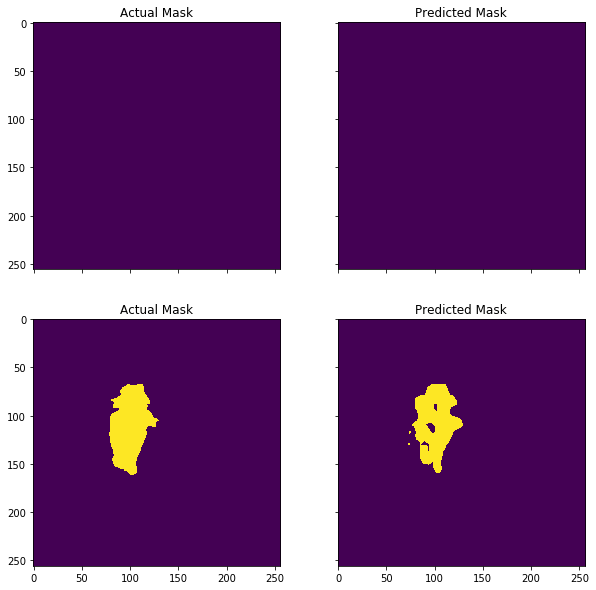

In [7]:
preds = model_res18(batch[0].cuda()).detach().cpu()
plot_preds(preds, batch[1])


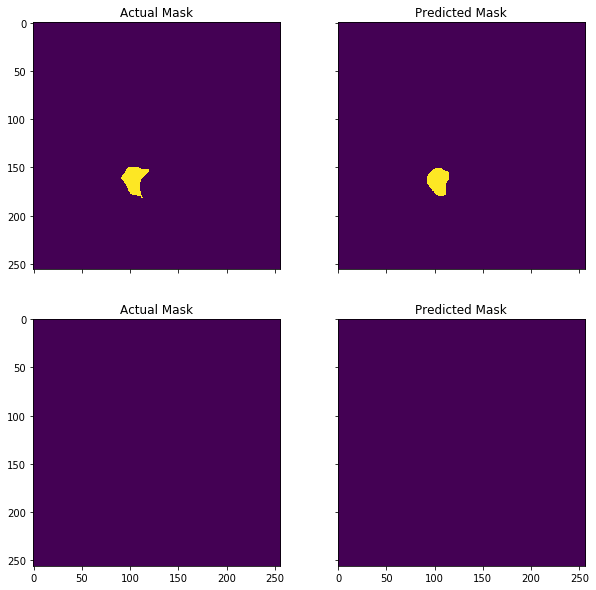

In [8]:
preprocessing_fn = get_preprocessing_fn("resnet50", "imagenet")
test_ds = BrainMriSegmentation(stacker.test_df, transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=2)
model_res50 = torch.load("/home/nlittlefield/Documents/2.5D-brain-mri-segmentation/models/fpn-resnet50_aug_2021-08-25.pth")
model_res50 = model_res50.cuda()
batch = next(iter(test_dl))
plot_preds(model_res50(batch[0].cuda()), batch[1])

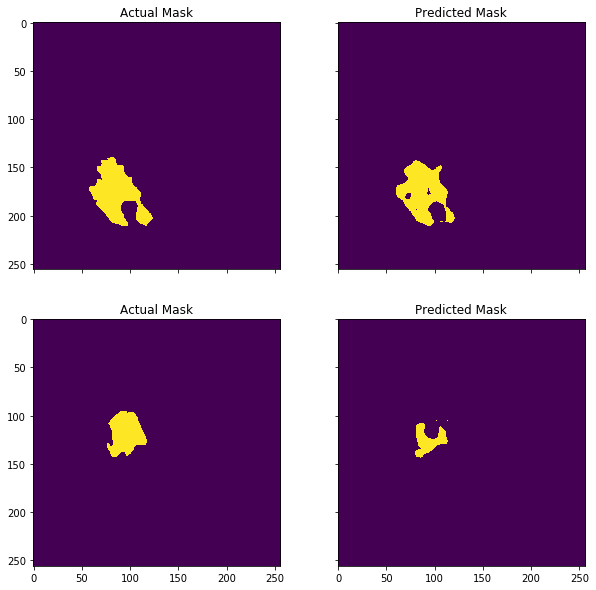

In [9]:
preprocessing_fn = get_preprocessing_fn("resnext50_32x4d", "imagenet")
test_ds = BrainMriSegmentation(stacker.test_df, transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=2)
model_resnext50 = torch.load("/home/nlittlefield/Documents/2.5D-brain-mri-segmentation/models/fpn-resnext50_aug_2021-08-25.pth")
model_resnext50 = model_resnext50.cuda()
batch = next(iter(test_dl))
plot_preds(model_resnext50(batch[0].cuda()), batch[1])

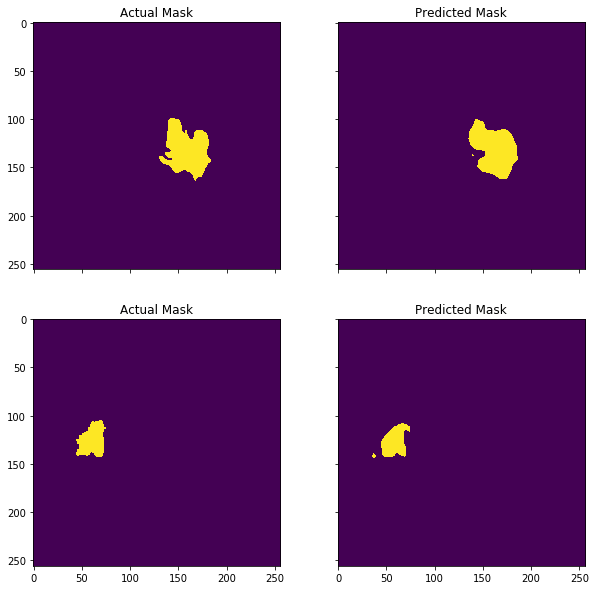

In [10]:
preprocessing_fn = get_preprocessing_fn("efficientnet-b4", "imagenet")
test_ds = BrainMriSegmentation(stacker.test_df, transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=2)
model_eff = torch.load("/home/nlittlefield/Documents/2.5D-brain-mri-segmentation/models/fpn-efficientnet-b4_aug_2021-08-25.pth")
model_eff = model_eff.cuda()
batch = next(iter(test_dl))
plot_preds(model_eff(batch[0].cuda()), batch[1])